In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%pwd

'/Users/redstockings/Desktop/Techlent/HealthCare Provider Fraud'

### 1. Import data

In [3]:
df_train_inpatient = pd.read_csv("/Users/redstockings/Desktop/Techlent/HealthCare Provider Fraud/data/Train_Inpatientdata-1542865627584.csv")

In [4]:
df_train_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df_train_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [6]:
df_train_inpatient.describe() 
#the describe() info for claim procedure codes and diagnosis procedure codes doesn't make sense since they are not numerical values. 

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


In [7]:
df_train_outpatient = pd.read_csv("/Users/redstockings/Desktop/Techlent/HealthCare Provider Fraud/data/Train_Outpatientdata-1542865627584.csv")

In [8]:
df_train_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [9]:
df_train_outpatient.describe()
#the describe() info for claim procedure codes and diagnosis procedure codes doesn't make sense since they are not numerical values. 

,InscClaimAmtReimbursed,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid
count,517737.000000,162.000000,36.000000,4.000000,2.000000,0.0,0.0,517737.000000
mean,286.334799,6116.611111,4503.277778,2959.000000,4075.500000,NaN,NaN,2.779233
std,694.034343,3217.719258,2504.015000,1863.455393,5323.806956,NaN,NaN,15.785839
min,0.000000,51.000000,412.000000,412.000000,311.000000,NaN,NaN,0.000000
25%,40.000000,3893.000000,2724.000000,2146.000000,2193.250000,NaN,NaN,0.000000
50%,80.000000,5244.500000,4019.000000,3511.500000,4075.500000,NaN,NaN,0.000000
75%,200.000000,9421.500000,5849.000000,4324.500000,5957.750000,NaN,NaN,0.000000
max,102500.000000,9999.000000,9982.000000,4401.000000,7840.000000,NaN,NaN,897.000000


In [10]:
df_train_beneficiary = pd.read_csv("/Users/redstockings/Desktop/Techlent/HealthCare Provider Fraud/data/Train_Beneficiarydata-1542865627584.csv")

In [11]:
df_train_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [12]:
df_train_beneficiary.describe()  #why there are means for race and state??

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,...,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,...,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,...,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [13]:
df_train_target = pd.read_csv('/Users/redstockings/Desktop/Techlent/HealthCare Provider Fraud/data/Train-1542865627584.csv')

In [14]:
df_train_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [15]:
df_train_target.describe()

,Provider,PotentialFraud
count,5410,5410
unique,5410,2
top,PRV51001,No
freq,1,4904


In [16]:
#ratio of non-fraudulent providers vs fraudulent providers:
"{:.3f}".format(df_train_target[df_train_target.PotentialFraud == "Yes"].PotentialFraud.count()/len(df_train_target))

'0.094'

### 2. Missing data in inpatient data

In [17]:
df_train_inpatient.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [18]:
df_train_inpatient.isnull().sum()/len(df_train_inpatient)

BeneID                    0.000000
ClaimID                   0.000000
ClaimStartDt              0.000000
ClaimEndDt                0.000000
Provider                  0.000000
InscClaimAmtReimbursed    0.000000
AttendingPhysician        0.002767
OperatingPhysician        0.411227
OtherPhysician            0.884123
AdmissionDt               0.000000
ClmAdmitDiagnosisCode     0.000000
DeductibleAmtPaid         0.022212
DischargeDt               0.000000
DiagnosisGroupCode        0.000000
ClmDiagnosisCode_1        0.000000
ClmDiagnosisCode_2        0.005584
ClmDiagnosisCode_3        0.016702
ClmDiagnosisCode_4        0.037901
ClmDiagnosisCode_5        0.071503
ClmDiagnosisCode_6        0.119534
ClmDiagnosisCode_7        0.179325
ClmDiagnosisCode_8        0.245639
ClmDiagnosisCode_9        0.333473
ClmDiagnosisCode_10       0.902975
ClmProcedureCode_1        0.428077
ClmProcedureCode_2        0.865247
ClmProcedureCode_3        0.976158
ClmProcedureCode_4        0.997134
ClmProcedureCode_5  

<AxesSubplot:>

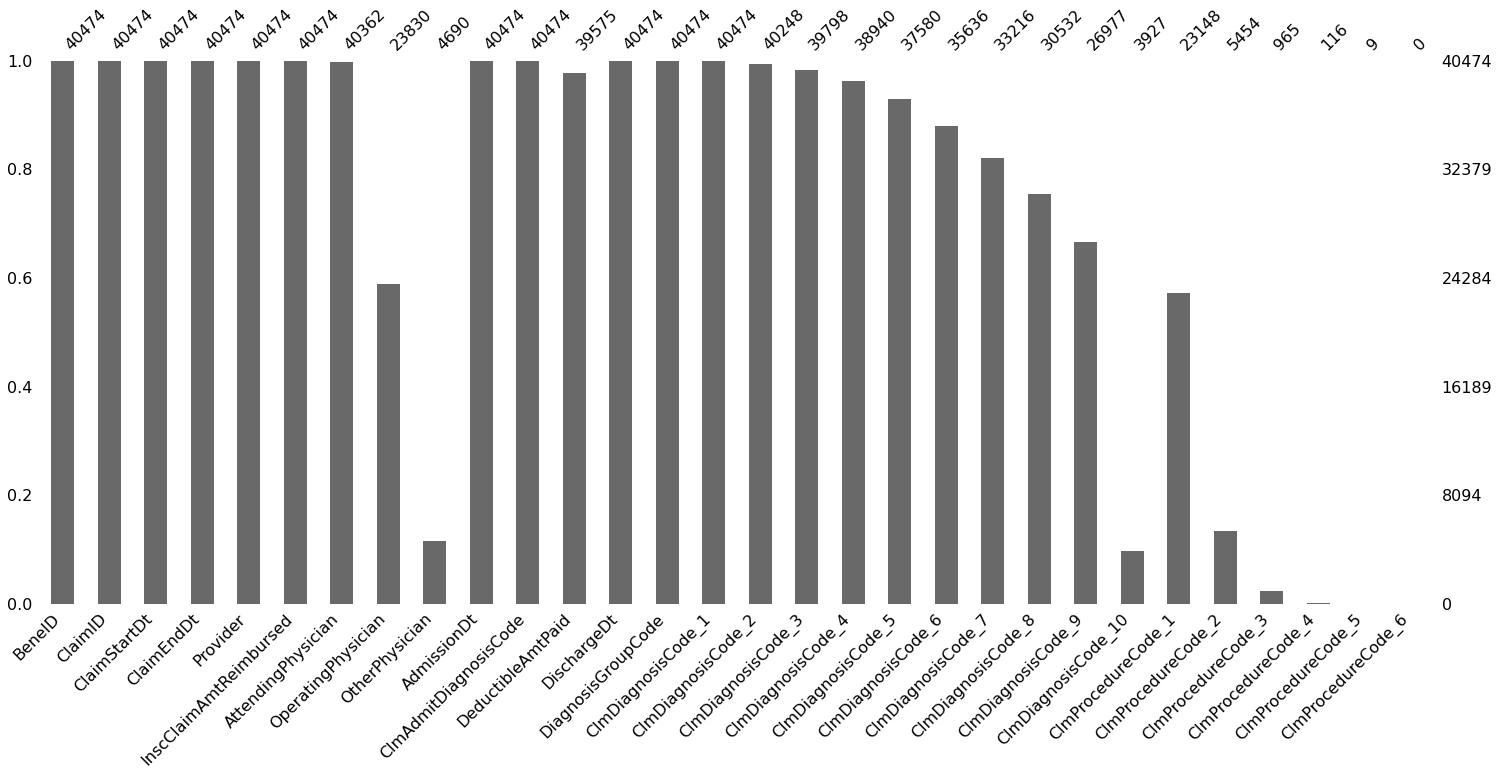

In [19]:
import missingno as msno
msno.bar(df_train_inpatient)
#The height of the bar indicates how complete that column is, i.e, how many non-null values are present

<AxesSubplot:>

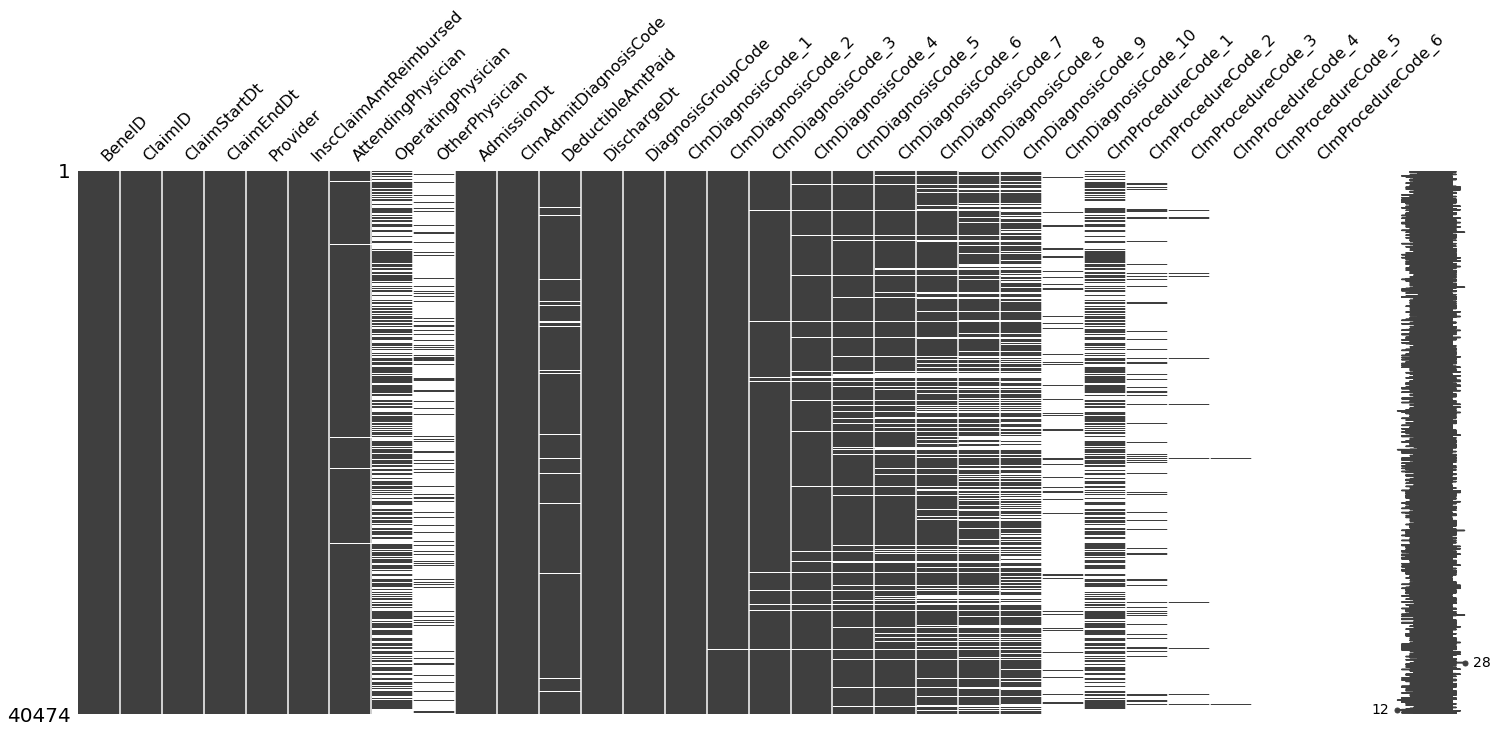

In [20]:
msno.matrix(df_train_inpatient)

<AxesSubplot:>

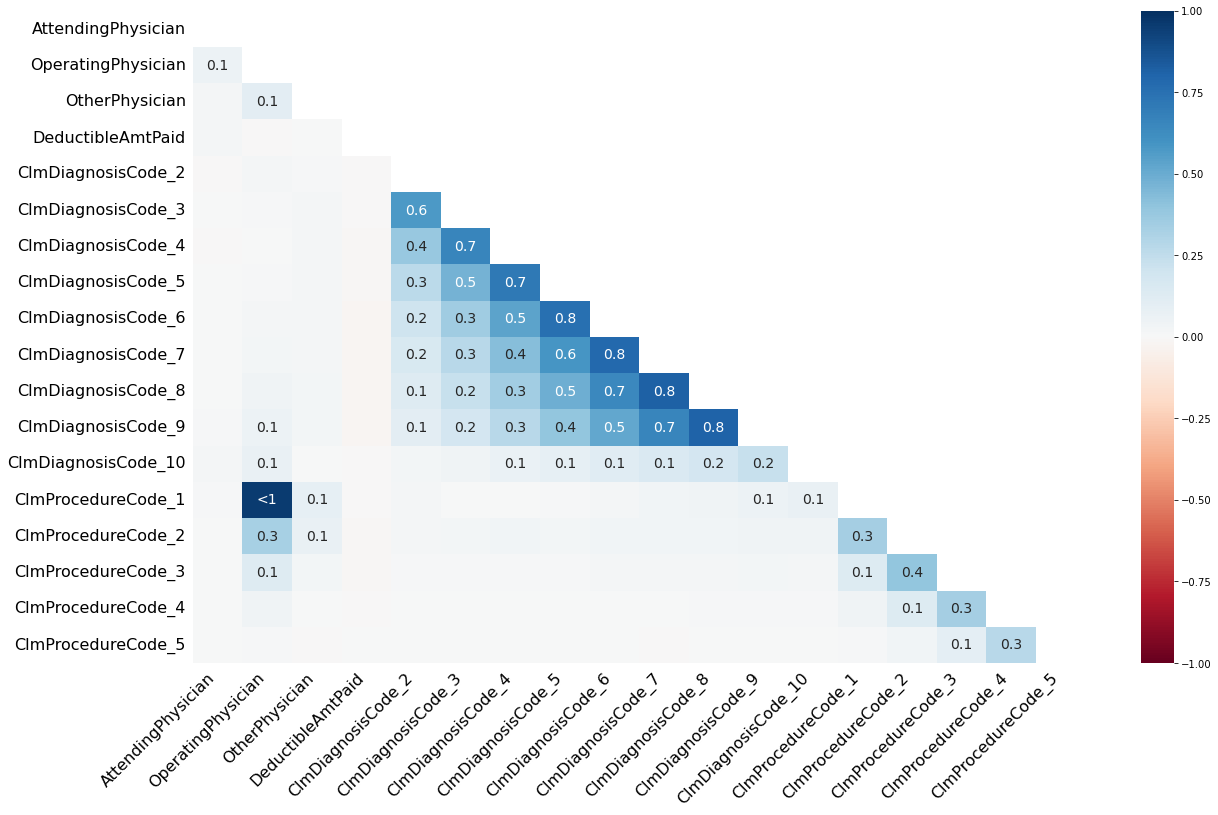

In [21]:
msno.heatmap(df_train_inpatient)
#used to identify if there is a relationship in the presence of null values between each of the columns.
#There are a number of values that show as <-1. This indicates that the correlation is very close to being 100% negative.

* #### Quick Summary

1. Missing data are present in the columns of AttendingPhysician, OperatingPhysician,OtherPhysician, DeductibleAmtPaid, ClmDiagnosisCodes and ClmProcedureCodes.
2. Only 0.3% of missing data in AttendingPhysician, in comparison with 41% in OperatingPhysician and 88% in OtherPhysician. 
3. Approximatley 2% of missing data in DeductibleAmtPaid. 
4. There is NO missing data in ClmDiagnosisCode_1, while there are approximately 0.6%, 1.7%, 3.8%, 7.1%, 12%, 18%, 24%, 33%, and 90% in ClmDiagnosisCode_2, 3, 4, 5, 6, 7, 8, 9 and 10, perspectively. <ins>It likely makes sense because not all case will need 10 claim diagnosis codes.</ins> 
5. There are higher percentages of missing data in procedure codes. There are approxiately 43%, 87%, 98%, 99.7%, 99.98% and 100% of missing data in ClmProcedureCodes. <ins>Does all inpatient service have procedures to be done?</ins> 

### Further looking into the missing procedure codes - check the percentage of fraudulent providers with missing procedure codes vs. percentage of fraudulent providers withouth missing procedure codes.

In [22]:
df_train_inpatient['NumClmProcedureCodes'] = df_train_inpatient[['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5']].notnull().sum(axis = 1)

In [24]:
df_train_inpatient['MissingClmProcedureCodes'] = ~df_train_inpatient['NumClmProcedureCodes'].astype(bool)

### Merge the fraudulent providers info into the inpatient data

In [32]:
df1_inp = pd.merge(df_train_inpatient,df_train_target, on = "Provider")

In [33]:
df1_inp.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,NumClmProcedureCodes,MissingClmProcedureCodes,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,Yes
1,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,2,False,Yes
2,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,1,False,Yes
3,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,1,False,Yes
4,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,...,NaN,8543.0,NaN,NaN,NaN,NaN,NaN,1,False,Yes


<AxesSubplot:title={'center':'Number of Claims w/o ClmProcedureCodes'}, xlabel='PotentialFraud'>

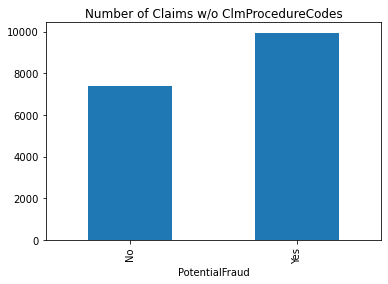

In [34]:
#Number of claims with missing ClmProcedureCodes submitted by Non-Frauduluent and Fraudulent Providers 
df1_inp.groupby(['PotentialFraud']).MissingClmProcedureCodes.sum().plot(kind = 'bar', title ='Number of Claims w/o ClmProcedureCodes')

In [35]:
#Percentage of claims with missing ClmProcedureCodes submitted by Non-Frauduluent and Fraudulent Providers 
PercentageofClaim = df1_inp.groupby(['PotentialFraud']).MissingClmProcedureCodes.sum().divide(df1_inp.groupby(['PotentialFraud']).ClaimID.count())

In [36]:
df1_inp.groupby(['PotentialFraud']).ClaimID.count()

PotentialFraud
No     17072
Yes    23402
Name: ClaimID, dtype: int64

<AxesSubplot:title={'center':'Percentage of Claims w/o ClmProcedureCodes'}, xlabel='PotentialFraud'>

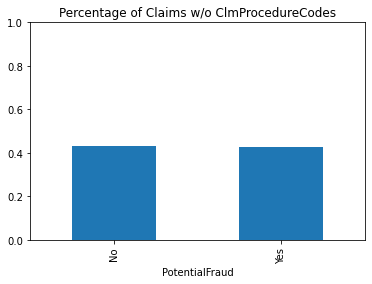

In [37]:
PercentageofClaim.plot(kind = 'bar', title = "Percentage of Claims w/o ClmProcedureCodes",ylim = (0,1))

* Quick Summary - There is no apparent difference in the missingClmProcedureCodes between fraudulent and non-fraudulent provides

### 3. Missing data in Outpatient data

In [38]:
df_train_outpatient.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

In [39]:
df_train_outpatient.isnull().sum()/len(df_train_outpatient)

BeneID                    0.000000
ClaimID                   0.000000
ClaimStartDt              0.000000
ClaimEndDt                0.000000
Provider                  0.000000
InscClaimAmtReimbursed    0.000000
AttendingPhysician        0.002696
OperatingPhysician        0.824975
OtherPhysician            0.623272
ClmDiagnosisCode_1        0.020190
ClmDiagnosisCode_2        0.377373
ClmDiagnosisCode_3        0.607413
ClmDiagnosisCode_4        0.757414
ClmDiagnosisCode_5        0.856406
ClmDiagnosisCode_6        0.905829
ClmDiagnosisCode_7        0.936336
ClmDiagnosisCode_8        0.955746
ClmDiagnosisCode_9        0.971341
ClmDiagnosisCode_10       0.997908
ClmProcedureCode_1        0.999687
ClmProcedureCode_2        0.999930
ClmProcedureCode_3        0.999992
ClmProcedureCode_4        0.999996
ClmProcedureCode_5        1.000000
ClmProcedureCode_6        1.000000
DeductibleAmtPaid         0.000000
ClmAdmitDiagnosisCode     0.796373
dtype: float64

<AxesSubplot:>

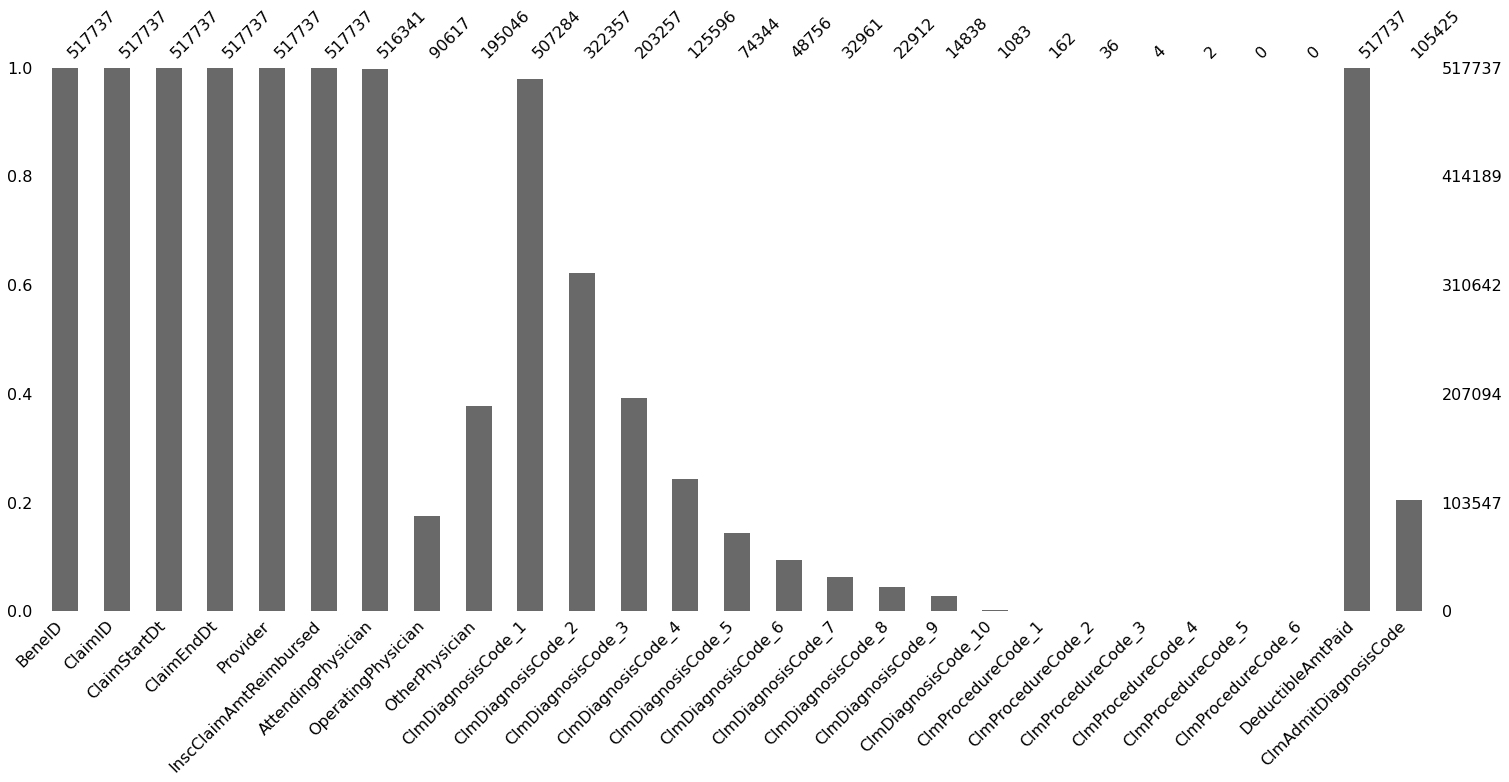

In [40]:
msno.bar(df_train_outpatient)

<AxesSubplot:>

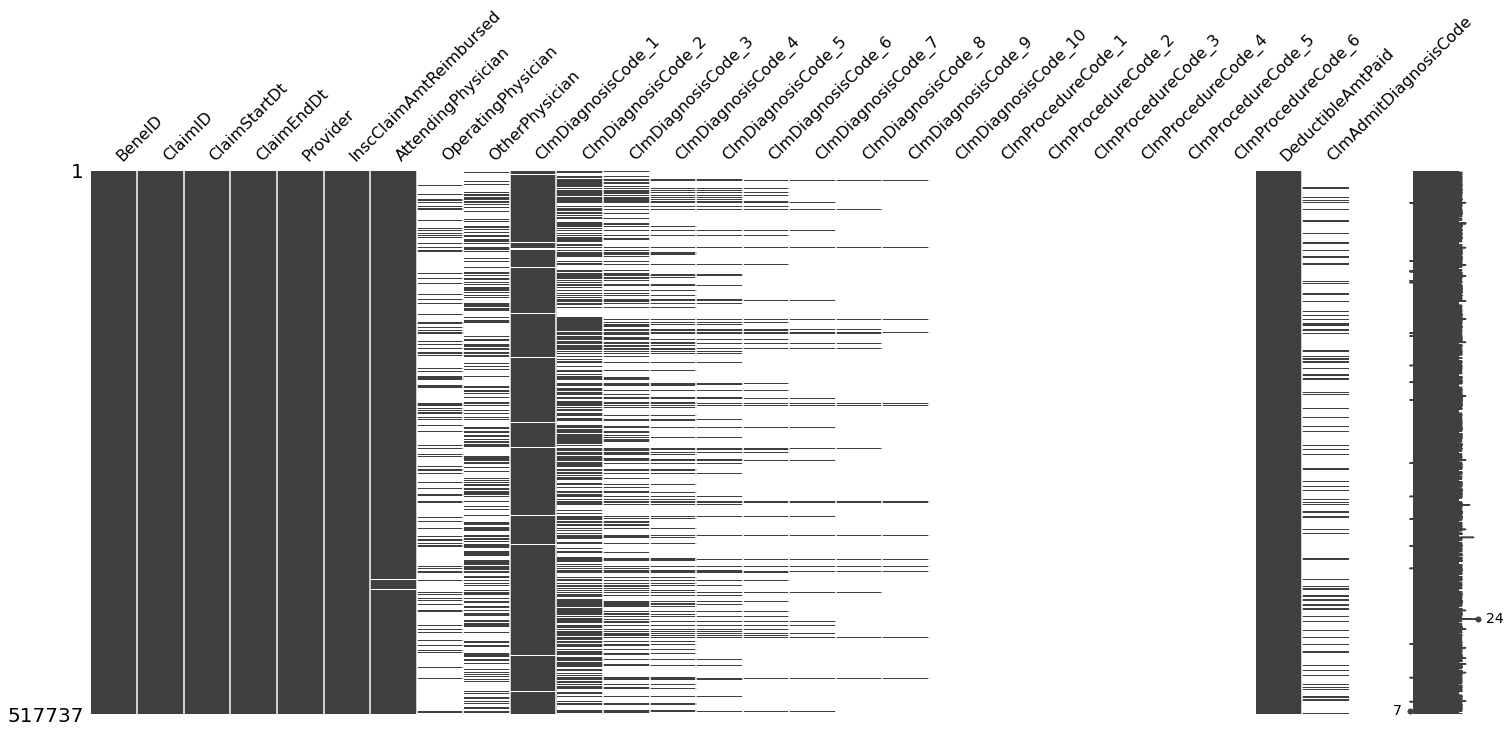

In [41]:
msno.matrix(df_train_outpatient)

<AxesSubplot:>

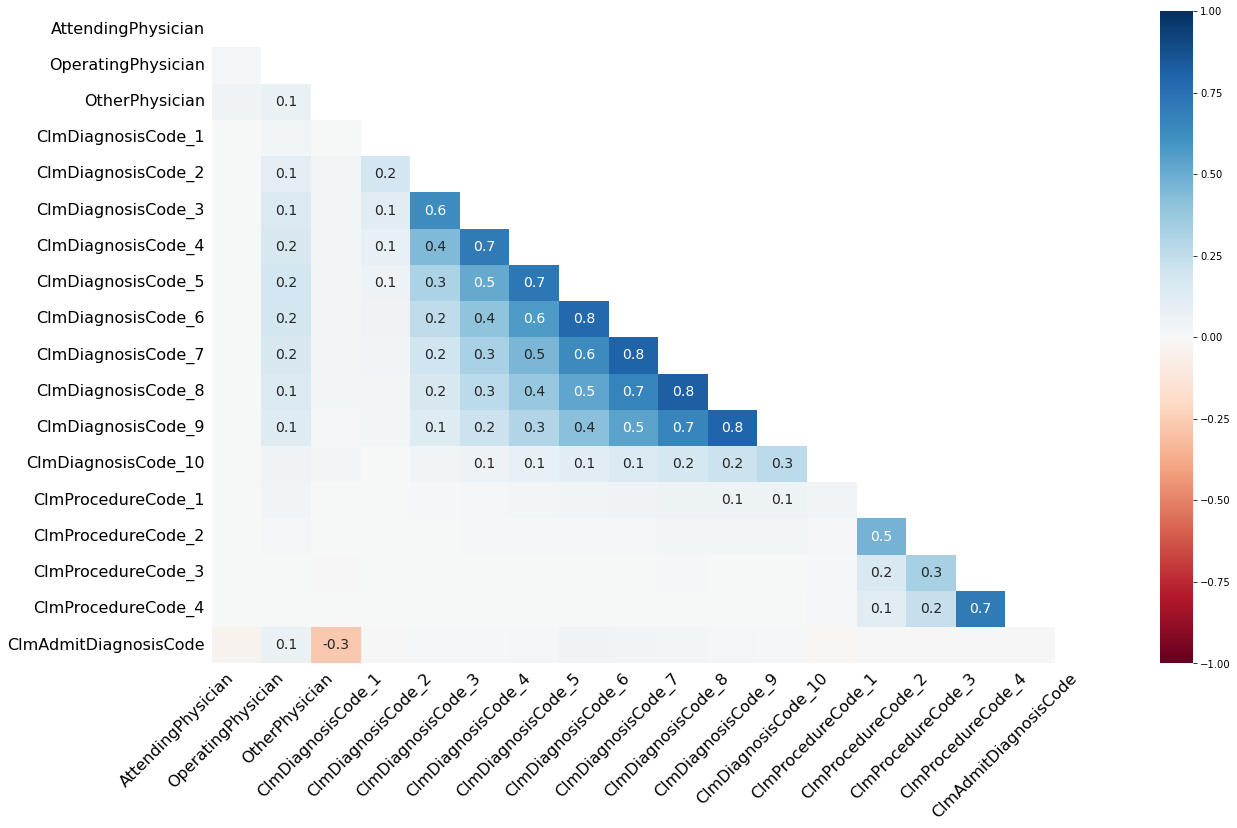

In [42]:
msno.heatmap(df_train_outpatient)

* #### Quick Summary

* Similar to inpatient data, missing data are present in the columns of AttendingPhysician, OperatingPhysician,OtherPhysician, ClmDiagnosisCodes, ClmProcedureCodes and ClmAdmitDiagnosisCode.
* Only 0.3% of missing data in AttendingPhysician, in comparison with 82% in OperatingPhysician and 62% in OtherPhysician. 
* There are approximately 2%, 38%, 61%, 76%, 85%, 91%, 94%, 96%, 97%, and 99.79% in ClmDiagnosisCode_1, 2, 3, 4, 5, 6, 7, 8, 9 and 10, perspectively. The ratio of missing data is <ins>much higher</ins> compared to that in the outpatient data. <ins>The increasing fraction of missing data along with the ClmDiagnosisCodes appears to make sense because not all case will need 10 claim diagnosis codes.</ins> 
* There are very higher percentages of missing data in procedure codes. There are approxiately 99.97%, 99.99%, 99.999%, 99.9996%, 100% and 100% of missing data in ClmProcedureCodes. <ins> This likely makes sense since most of the procedures are conducted as part of outpatient services.</ins> 
* Approximately 79.6% of data is missing for ClmAdmitDiagnosisCode.

### Further looking into the percentage of claims provided by non-frauduent and frauduent providers with missing data in each category.
* AttendingPhysician
* OperatingPhysician
* OtherPhysician
* ClmDiagnosisCodes
* ClmProcedureCodes
* ClmAdmitDiagnosisCode.

### Merge the fraudulent providers info into the inpatient data

In [43]:
df1_outp = pd.merge(df_train_outpatient,df_train_target, on = "Provider")
df1_outp.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes


#### 3.A AttendingPhysician

In [44]:
df1_outp.groupby(['PotentialFraud']).count()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
PotentialFraud,,,,,,,,,,,,,,,,,,,,,
No,328343,328343,328343,328343,328343,328343,327454,57491,122674,321725,...,9387,659,93,19,1,1,0,0,328343,66778
Yes,189394,189394,189394,189394,189394,189394,188887,33126,72372,185559,...,5451,424,69,17,3,1,0,0,189394,38647


In [45]:
#Percentage of claims filed by non-fraudent and frauduent providers without attending physician info
PercentClaims= 1 - df1_outp.groupby(['PotentialFraud']).AttendingPhysician.count().divide(df1_outp.groupby(['PotentialFraud']).ClaimID.count())

<AxesSubplot:title={'center':'Percentage of Claims w/o AttendingPhysician'}, xlabel='PotentialFraud'>

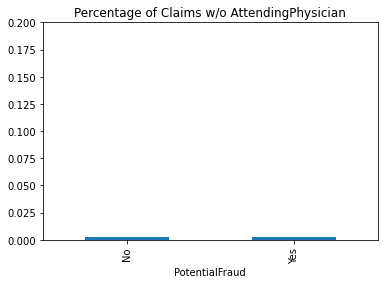

In [47]:
PercentClaims.plot(kind= 'bar', title = 'Percentage of Claims w/o AttendingPhysician', ylim = (0,0.2))

#### 3.B OperatingPhysician

In [48]:
#Percentage of claims filed by non-fraudent and frauduent providers without operating physician info
PercentClaims= 1 - df1_outp.groupby(['PotentialFraud']).OperatingPhysician.count().divide(df1_outp.groupby(['PotentialFraud']).ClaimID.count())

<AxesSubplot:title={'center':'Percentage of Claims w/o AttendingPhysician'}, xlabel='PotentialFraud'>

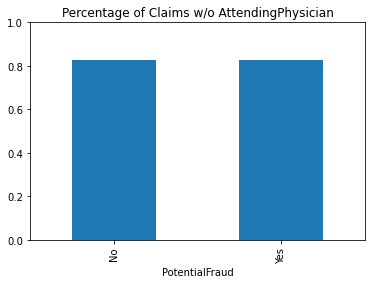

In [49]:
PercentClaims.plot(kind= 'bar', title = 'Percentage of Claims w/o AttendingPhysician', ylim = (0,1))

#### 3.C OtherPhysician

In [50]:
#Percentage of claims filed by non-fraudent and frauduent providers without operating physician info
PercentClaims= 1 - df1_outp.groupby(['PotentialFraud']).OtherPhysician.count().divide(df1_outp.groupby(['PotentialFraud']).ClaimID.count())

<AxesSubplot:title={'center':'Percentage of Claims w/o AttendingPhysician'}, xlabel='PotentialFraud'>

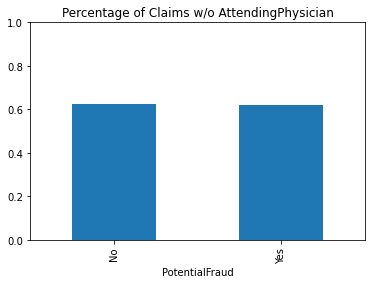

In [51]:
PercentClaims.plot(kind= 'bar', title = 'Percentage of Claims w/o AttendingPhysician', ylim = (0,1))

#### 3.D ClmDiagnosisCodes

In [52]:
df1_outp['NumClmDiagnosisCodes'] = df1_outp[['ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10']].notnull().sum(axis = 1)

In [53]:
df1_outp['MissingClmDiagnosisCodes'] = ~df1_outp['NumClmDiagnosisCodes'].astype(bool)

In [54]:
df1_outp.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,NumClmDiagnosisCodes,MissingClmDiagnosisCodes
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,0,56409,Yes,3,False
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes,1,False
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,0,71947,Yes,6,False
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes,1,False
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes,4,False


In [55]:
#Percentage of claims with missing ClmDiagnosisCodes submitted by Non-Frauduluent and Fraudulent Providers 
PercentClaims = df1_outp.groupby(['PotentialFraud']).MissingClmDiagnosisCodes.sum().divide(df1_outp.groupby(['PotentialFraud']).ClaimID.count())

<AxesSubplot:xlabel='PotentialFraud', ylabel='Percentage of Claims w/o ClmDiagnosisCodes'>

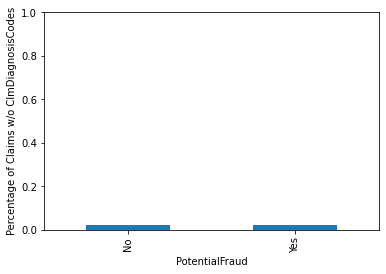

In [56]:
PercentClaims.plot(kind= 'bar', ylabel = 'Percentage of Claims w/o ClmDiagnosisCodes', ylim = (0,1))

#### 3.E ClmProcedureCodes

In [57]:
df1_outp['NumClmProcedureCodes'] = df1_outp[['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6']].notnull().sum(axis = 1)

In [58]:
df1_outp['MissingProcedureCodes'] = ~df1_outp['NumClmProcedureCodes'].astype(bool)

In [59]:
df1_outp.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud,NumClmDiagnosisCodes,MissingClmDiagnosisCodes,NumClmProcedureCodes,MissingProcedureCodes
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,0,56409,Yes,3,False,0,True
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,0,NaN,Yes,1,False,0,True
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,0,71947,Yes,6,False,0,True
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,NaN,NaN,NaN,0,NaN,Yes,1,False,0,True
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,NaN,NaN,0,NaN,Yes,4,False,0,True


In [60]:
#Percentage of claims with missing ClmProcedureCodes submitted by Non-Frauduluent and Fraudulent Providers 
PercentClaims = df1_outp.groupby(['PotentialFraud']).MissingProcedureCodes.sum().divide(df1_outp.groupby(['PotentialFraud']).ClaimID.count())

<AxesSubplot:title={'center':'Percentage of Claims w/o ClmDiagnosisCodes'}, xlabel='PotentialFraud'>

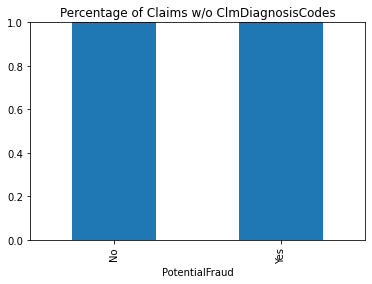

In [62]:
PercentClaims.plot(kind= 'bar', title= 'Percentage of Claims w/o ClmDiagnosisCodes', ylim = (0,1))

#### 3.F ClmAdmitDiagnosisCode

In [63]:
#Percentage of claims filed by non-fraudent and frauduent providers without ClmAdmitDiagnosisCode info
PercentClaims= 1 - df1_outp.groupby(['PotentialFraud']).ClmAdmitDiagnosisCode.count().divide(df1_outp.groupby(['PotentialFraud']).ClaimID.count())

<AxesSubplot:title={'center':'Percentage of Claims w/o ClmDiagnosisCodes'}, xlabel='PotentialFraud'>

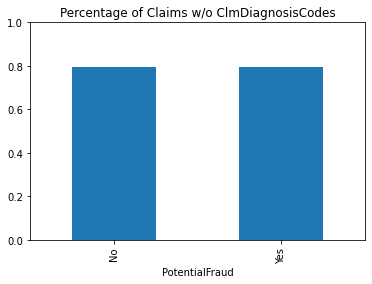

In [64]:
PercentClaims.plot(kind= 'bar', title = 'Percentage of Claims w/o ClmDiagnosisCodes', ylim = (0,1))

### 4. Missing data in Beneficiary

In [65]:
df_train_beneficiary.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [66]:
# percentage of missing data under DOD (Date of Death)
'{:.00%}'.format(df_train_beneficiary.DOD.isnull().sum()/len(df_train_beneficiary))

'99%'

* Quick Summary

We only have missing data in the column of DOD, approximately 99%. It likely makes sense since it is a column indiciating the beneficiary is dead. 

### Further check the number of claims filed by non-fraudulent and fraudulent providers for beneficiaries who have been dead

In [67]:
df1_benef_inpatientclaim = pd.merge(df_train_beneficiary,df1_inp[['BeneID','ClaimID','Provider','PotentialFraud']],on = 'BeneID',how = 'left')

In [68]:
df1_benef_inpatientclaim.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,Provider,PotentialFraud
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,2,1,1,36000,3204,60,70,CLM46614,PRV55912,Yes
1,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,2,1,1,36000,3204,60,70,CLM66048,PRV55907,No
2,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,2,1,1,36000,3204,60,70,CLM68358,PRV56046,No
3,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,0,0,30,50,NaN,NaN,NaN
4,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,2,0,0,90,40,NaN,NaN,NaN


In [69]:
df1_benef_inpatientclaim[df1_benef_inpatientclaim.DOD.notnull()].ClaimID.notnull().sum()

318

In [70]:
df1_benef_inpatientclaim[df1_benef_inpatientclaim.DOD.notnull()].PotentialFraud.notnull().sum()

318

In [71]:
#Percentage of Claims filed by non-fraudulent and frauduelnt providers for beneficiaries who are dead
PercentClaims = df1_benef_inpatientclaim[df1_benef_inpatientclaim.DOD.notnull()].groupby(['PotentialFraud']).ClaimID.count()/df1_benef_inpatientclaim[df1_benef_inpatientclaim.DOD.notnull()].ClaimID.notnull().sum()

<AxesSubplot:title={'center':'Percentage of Claims filed for Beneficiaries who are dead'}, xlabel='PotentialFraud'>

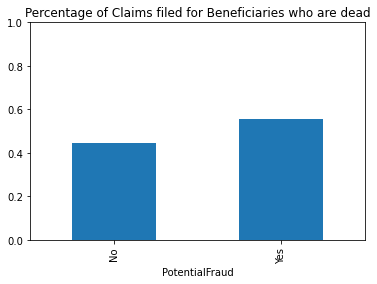

In [72]:
PercentClaims.plot(kind= 'bar', title = 'Percentage of Claims filed for Beneficiaries who are dead', ylim = (0,1))

In [30]:
df_train_target[df_train_target.PotentialFraud == 'Yes'].count()

Provider          506
PotentialFraud    506
dtype: int64

In [31]:
df_train_target.duplicated().sum()

0

In [32]:
df_train_target[df_train_target.PotentialFraud == 'Yes'].count()/len(df_train_target)

Provider          0.09353
PotentialFraud    0.09353
dtype: float64

In [34]:
df_train_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [35]:
df_train_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [38]:
df_train_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [45]:
df1_inp = pd.merge(df_train_inpatient,df_train_target, on = "Provider")

In [46]:
df1_inp.groupby(['PotentialFraud']).InscClaimAmtReimbursed.sum()

PotentialFraud
No     167008510
Yes    241288510
Name: InscClaimAmtReimbursed, dtype: int64

In [42]:
df1_outp = pd.merge(df_train_outpatient,df_train_target, on = "Provider")

In [43]:
df1_outp.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Yes


In [47]:
df1_outp.groupby(['PotentialFraud']).InscClaimAmtReimbursed.sum()

PotentialFraud
No     93853510
Yes    54392610
Name: InscClaimAmtReimbursed, dtype: int64

In [54]:
# claims under fraudulent providers
'{:.3e}'.format(241288510+54392610)

'2.957e+08'

In [55]:
# claims under non-fraudulent providers
'{:.3e}'.format(167008510+93853510)

'2.609e+08'

In [56]:
df_train_Beneficiarydata.sum()

/var/folders/y9/snh95y0146gf1c50b0dyvfm00000gn/T/ipykernel_1785/3603663220.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train_Beneficiarydata.sum()


BeneID                             BENE11001BENE11002BENE11003BENE11004BENE11005B...
DOB                                1943-01-011936-09-011936-08-011922-07-011935-0...
Gender                                                                        217662
Race                                                                          173820
RenalDiseaseIndicator              00000000Y0000Y000000000Y0000000000000000000000...
State                                                                        3556280
County                                                                      51878795
NoOfMonths_PartACov                                                          1649887
NoOfMonths_PartBCov                                                          1650222
ChronicCond_Alzheimer                                                         231086
ChronicCond_Heartfailure                                                      208710
ChronicCond_KidneyDisease                                        

In [61]:
'{:.3e}'.format(507162970+179876080)

'6.870e+08'